In [1]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
# reading csv files
data =  pd.read_csv("C:/Users/Mohsen/Desktop/creditcard.csv")
df=pd.DataFrame(data)
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [2]:
df.shape

(284807, 31)

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Which attributes seem to be correlated
correlation =df.corr(method='pearson')
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777386e-12,-2.119585e-12,-1.724017e-13,-3.472870e-12,-1.306592e-13,-1.127393e-13,2.115132e-12,3.081639e-14,...,-3.276409e-12,2.281843e-12,-2.971523e-12,-1.029987e-12,1.146728e-12,1.835367e-12,7.624885e-12,-9.774773e-13,-0.227709,-0.101347
V2,-0.010593,3.777386e-12,1.000000e+00,2.326821e-12,-2.314711e-12,-1.832637e-12,9.439633e-13,5.403061e-12,2.153414e-14,3.239499e-13,...,2.280624e-12,-2.545709e-13,-4.855967e-12,6.430858e-13,-9.427890e-13,-4.128661e-13,-9.857578e-13,2.525320e-12,-0.531409,0.091289
V3,-0.419618,-2.119585e-12,2.326821e-12,1.000000e+00,2.036710e-13,-4.031527e-12,-1.582965e-13,3.404521e-12,-1.271766e-12,-6.819934e-13,...,6.735960e-13,-8.922035e-13,4.146836e-12,3.408174e-12,5.718362e-13,-2.576520e-12,-5.041949e-12,5.188994e-12,-0.210880,-0.192961
V4,-0.105260,-1.724017e-13,-2.314711e-12,2.036710e-13,1.000000e+00,-2.549916e-13,1.083580e-12,8.130086e-13,7.338233e-13,-7.138427e-13,...,-2.696261e-12,4.343923e-13,-4.161184e-12,-2.368673e-12,1.619552e-12,-3.045481e-13,-1.455904e-12,-2.832333e-12,0.098732,0.133447
V5,0.173072,-3.472870e-12,-1.832637e-12,-4.031527e-12,-2.549916e-13,1.000000e+00,-6.988066e-14,1.573950e-11,-2.038440e-12,-1.000460e-12,...,-1.752003e-12,7.097727e-13,3.616455e-12,-2.808758e-13,1.452161e-12,-1.895655e-13,-2.124508e-12,1.010195e-11,-0.386356,-0.094974
V6,-0.063016,-1.306592e-13,9.439633e-13,-1.582965e-13,1.083580e-12,-6.988066e-14,1.000000e+00,-2.798863e-12,-5.446449e-13,2.036992e-12,...,1.476734e-12,-1.145022e-12,-1.527599e-12,1.552011e-12,-2.723515e-12,3.351155e-12,1.480833e-12,-6.072099e-13,0.215981,-0.043643
V7,0.084714,-1.127393e-13,5.403061e-12,3.404521e-12,8.130086e-13,1.573950e-11,-2.798863e-12,1.000000e+00,5.528624e-12,5.086017e-13,...,2.787549e-12,-8.133708e-13,-4.292216e-12,-2.553519e-12,-7.410166e-13,-4.475969e-12,-1.328689e-11,2.955517e-13,0.397311,-0.187257
V8,-0.036949,2.115132e-12,2.153414e-14,-1.271766e-12,7.338233e-13,-2.038440e-12,-5.446449e-13,5.528624e-12,1.000000e+00,-2.243351e-12,...,-4.022297e-12,-2.679598e-12,9.013096e-13,-1.074225e-12,-3.268920e-12,1.043929e-12,-3.500241e-12,1.866554e-12,-0.103079,0.019875
V9,-0.008660,3.081639e-14,3.239499e-13,-6.819934e-13,-7.138427e-13,-1.000460e-12,2.036992e-12,5.086017e-13,-2.243351e-12,1.000000e+00,...,3.040341e-12,-7.470414e-13,-1.011172e-12,8.577402e-13,-1.589032e-12,-7.738355e-13,2.429466e-12,-1.406037e-12,-0.044246,-0.097733


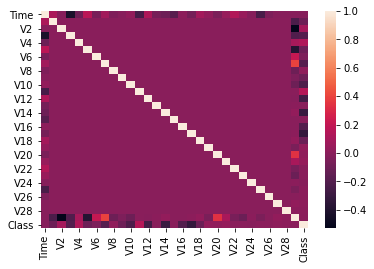

In [8]:
import seaborn as sns
sns.heatmap(correlation)

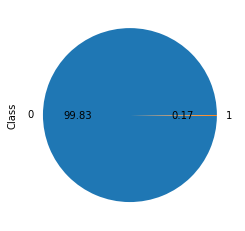

In [9]:
# balanced dataset and Normalize the dataset 
df['Class'].value_counts()
# dataset is imbalanced 
df['Class'].value_counts().plot.pie(autopct='%.2f')

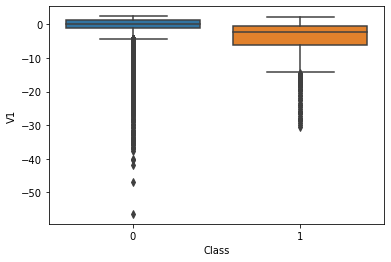

In [10]:
import seaborn as sns
ax = sns.boxplot(x=df['Class'], y=df['V1'], data=df)

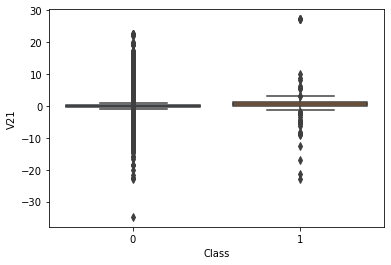

In [11]:
import seaborn as sns
ax = sns.boxplot(x=df['Class'], y=df['V21'], data=df)

In [12]:
import pandas as pd
credithistory_dataset = pd.DataFrame(df)
credithistory_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
X = credithistory_dataset.drop('Class',1)
X = X.drop('Amount',1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [14]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca = PCA()
X = pca.fit_transform(X)
X

array([[ 9.48138596e+04,  8.11851643e-01,  1.22085768e-01, ...,
        -2.28655501e-01,  1.29535774e-01, -2.65313757e-02],
       [ 9.48138596e+04, -1.56681536e+00, -2.42489117e-01, ...,
         1.54955755e-02, -1.49087623e-02,  6.34067567e-03],
       [ 9.48128596e+04,  8.44106647e-01,  1.38154777e+00, ...,
        -3.19509278e-01, -6.04380979e-02, -6.55652236e-02],
       ...,
       [-7.79741405e+04, -1.38698878e+00,  2.47212224e-01, ...,
         9.48864629e-02,  9.08726055e-03, -2.11634262e-02],
       [-7.79741404e+04,  4.50046606e-01, -5.33957373e-01, ...,
         5.05428620e-01,  1.15440093e-01,  1.14107877e-01],
       [-7.79781404e+04,  8.04226493e-01,  1.79413254e-01, ...,
        -8.01139040e-01, -6.35084271e-04,  1.81976515e-02]])

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5'])

In [16]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,94813.859609,0.810333,0.125766,-0.517175,-1.307430
1,94813.859568,-1.565516,-0.240840,0.797550,-0.029276
2,94812.859607,0.843052,1.407057,-0.273220,0.086303
3,94812.859582,0.524932,0.225977,-1.299240,0.490165
4,94811.859581,0.724228,-0.845678,-0.393065,-0.355104
...,...,...,...,...,...
284802,-77972.140457,12.678818,-10.218073,7.225908,6.997053
284803,-77973.140385,0.879170,0.074118,-2.563844,-0.605033
284804,-77974.140468,-1.386984,0.253436,1.061387,0.122086
284805,-77974.140401,0.447914,-0.528392,-0.479208,-0.713231


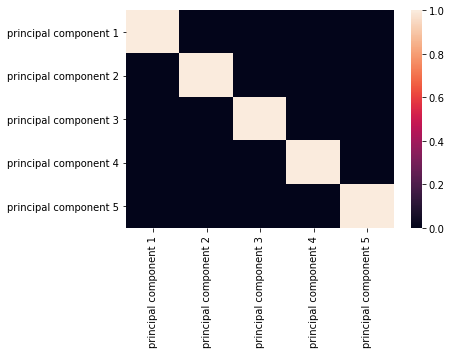

In [17]:
correlation =principalDf.corr(method='pearson')
correlation
sns.heatmap(correlation)

In [18]:
df2= df['Class']

df1= principalDf

df1

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,94813.859609,0.810333,0.125766,-0.517175,-1.307430
1,94813.859568,-1.565516,-0.240840,0.797550,-0.029276
2,94812.859607,0.843052,1.407057,-0.273220,0.086303
3,94812.859582,0.524932,0.225977,-1.299240,0.490165
4,94811.859581,0.724228,-0.845678,-0.393065,-0.355104
...,...,...,...,...,...
284802,-77972.140457,12.678818,-10.218073,7.225908,6.997053
284803,-77973.140385,0.879170,0.074118,-2.563844,-0.605033
284804,-77974.140468,-1.386984,0.253436,1.061387,0.122086
284805,-77974.140401,0.447914,-0.528392,-0.479208,-0.713231


In [19]:
df2

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [20]:
df_final = df1.join(df2)
df_final

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Class
0,94813.859609,0.810333,0.125766,-0.517175,-1.307430,0
1,94813.859568,-1.565516,-0.240840,0.797550,-0.029276,0
2,94812.859607,0.843052,1.407057,-0.273220,0.086303,0
3,94812.859582,0.524932,0.225977,-1.299240,0.490165,0
4,94811.859581,0.724228,-0.845678,-0.393065,-0.355104,0
...,...,...,...,...,...,...
284802,-77972.140457,12.678818,-10.218073,7.225908,6.997053,0
284803,-77973.140385,0.879170,0.074118,-2.563844,-0.605033,0
284804,-77974.140468,-1.386984,0.253436,1.061387,0.122086,0
284805,-77974.140401,0.447914,-0.528392,-0.479208,-0.713231,0


In [21]:
df=pd.DataFrame(df_final)

In [22]:
df3= credithistory_dataset['Amount']

In [23]:
df_final = df_final.join(df3)
df_final

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Class,Amount
0,94813.859609,0.810333,0.125766,-0.517175,-1.307430,0,149.62
1,94813.859568,-1.565516,-0.240840,0.797550,-0.029276,0,2.69
2,94812.859607,0.843052,1.407057,-0.273220,0.086303,0,378.66
3,94812.859582,0.524932,0.225977,-1.299240,0.490165,0,123.50
4,94811.859581,0.724228,-0.845678,-0.393065,-0.355104,0,69.99
...,...,...,...,...,...,...,...
284802,-77972.140457,12.678818,-10.218073,7.225908,6.997053,0,0.77
284803,-77973.140385,0.879170,0.074118,-2.563844,-0.605033,0,24.79
284804,-77974.140468,-1.386984,0.253436,1.061387,0.122086,0,67.88
284805,-77974.140401,0.447914,-0.528392,-0.479208,-0.713231,0,10.00


In [24]:
df4= credithistory_dataset['Time']
df_final = df_final.join(df4)
df_final

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Class,Amount,Time
0,94813.859609,0.810333,0.125766,-0.517175,-1.307430,0,149.62,0.0
1,94813.859568,-1.565516,-0.240840,0.797550,-0.029276,0,2.69,0.0
2,94812.859607,0.843052,1.407057,-0.273220,0.086303,0,378.66,1.0
3,94812.859582,0.524932,0.225977,-1.299240,0.490165,0,123.50,1.0
4,94811.859581,0.724228,-0.845678,-0.393065,-0.355104,0,69.99,2.0
...,...,...,...,...,...,...,...,...
284802,-77972.140457,12.678818,-10.218073,7.225908,6.997053,0,0.77,172786.0
284803,-77973.140385,0.879170,0.074118,-2.563844,-0.605033,0,24.79,172787.0
284804,-77974.140468,-1.386984,0.253436,1.061387,0.122086,0,67.88,172788.0
284805,-77974.140401,0.447914,-0.528392,-0.479208,-0.713231,0,10.00,172788.0


In [25]:
#Which attributes seem to be correlated
correlation =df_final.corr(method='pearson')
correlation

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Class,Amount,Time
principal component 1,1.000000e+00,-1.372508e-16,-3.141600e-17,-2.213760e-16,1.507254e-16,0.012323,0.010596,-1.000000e+00
principal component 2,-1.372508e-16,1.000000e+00,1.301531e-15,2.261566e-15,2.043134e-16,0.106158,0.233880,1.438497e-10
principal component 3,-3.141600e-17,1.301531e-15,1.000000e+00,-4.495146e-16,-3.084653e-16,-0.092684,0.529749,-5.806148e-12
principal component 4,-2.213760e-16,2.261566e-15,-4.495146e-16,1.000000e+00,-4.756595e-16,0.267397,0.347410,-1.660828e-10
principal component 5,1.507254e-16,2.043134e-16,-3.084653e-16,-4.756595e-16,1.000000e+00,0.012187,0.191945,-9.591136e-11
Class,1.232257e-02,1.061581e-01,-9.268435e-02,2.673966e-01,1.218687e-02,1.000000,0.005632,-1.232257e-02
Amount,1.059637e-02,2.338800e-01,5.297490e-01,3.474104e-01,1.919451e-01,0.005632,1.000000,-1.059637e-02
Time,-1.000000e+00,1.438497e-10,-5.806148e-12,-1.660828e-10,-9.591136e-11,-0.012323,-0.010596,1.000000e+00


In [26]:
df_final.describe()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Class,Amount,Time
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,-5.223241e-10,3.709625e-16,-7.008803e-17,1.358282e-16,-2.350427e-16,0.001727,88.349619,94813.859575
std,4.748815e+04,1.948872e+00,1.651258e+00,1.440314e+00,1.404988e+00,0.041527,250.120109,47488.145955
min,-7.797814e+04,-2.315139e+00,-2.235445e+01,-1.123002e+01,-3.102712e+01,0.000000,0.000000,0.000000
25%,-4.450664e+04,-1.474323e+00,-8.012315e-01,-8.801807e-01,-6.771244e-01,0.000000,5.600000,54201.500000
50%,1.012186e+04,4.807700e-02,-6.665784e-02,9.463674e-02,-7.223832e-02,0.000000,22.000000,84692.000000
75%,4.061236e+04,8.694024e-01,6.001982e-01,7.294894e-01,8.792447e-01,0.000000,77.165000,139320.500000
max,9.481386e+04,5.716914e+01,7.246168e+01,8.477200e+01,6.112906e+01,1.000000,25691.160000,172792.000000


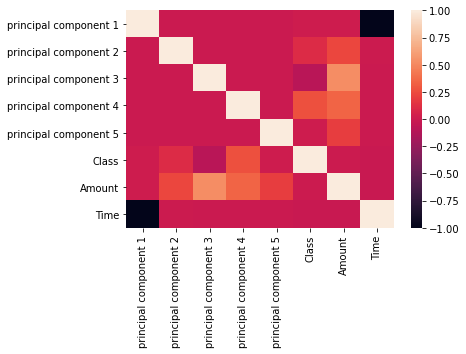

In [27]:

sns.heatmap(correlation)

In [28]:
#I could see multicollinearity, There is strong relation between Amount and component 3 . I dropped component 3 .
df_final = df_final.drop(labels=['principal component 3'], axis=1)

In [29]:
#Which attributes seem to be correlated
correlation =df_final.corr(method='pearson')
correlation

,principal component 1,principal component 2,principal component 4,principal component 5,Class,Amount,Time
principal component 1,1.000000e+00,-1.372508e-16,-2.213760e-16,1.507254e-16,0.012323,0.010596,-1.000000e+00
principal component 2,-1.372508e-16,1.000000e+00,2.261566e-15,2.043134e-16,0.106158,0.233880,1.438497e-10
principal component 4,-2.213760e-16,2.261566e-15,1.000000e+00,-4.756595e-16,0.267397,0.347410,-1.660828e-10
principal component 5,1.507254e-16,2.043134e-16,-4.756595e-16,1.000000e+00,0.012187,0.191945,-9.591136e-11
Class,1.232257e-02,1.061581e-01,2.673966e-01,1.218687e-02,1.000000,0.005632,-1.232257e-02
Amount,1.059637e-02,2.338800e-01,3.474104e-01,1.919451e-01,0.005632,1.000000,-1.059637e-02
Time,-1.000000e+00,1.438497e-10,-1.660828e-10,-9.591136e-11,-0.012323,-0.010596,1.000000e+00


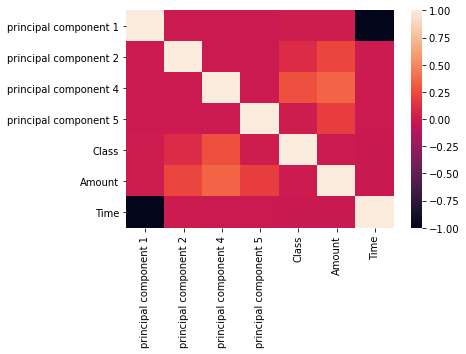

In [30]:
sns.heatmap(correlation)

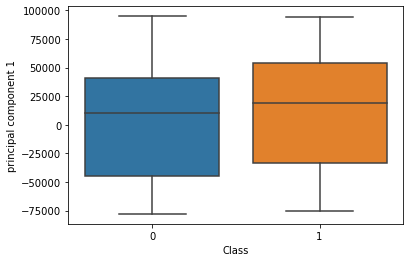

In [31]:
import seaborn as sns
ax = sns.boxplot(x=df_final['Class'], y=df_final['principal component 1'], data=df_final)

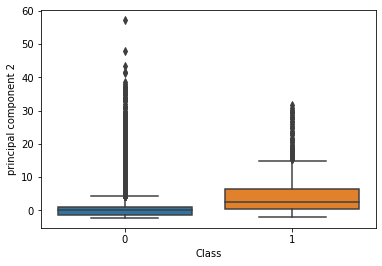

In [32]:
ax = sns.boxplot(x=df_final['Class'], y=df_final['principal component 2'], data=df_final)

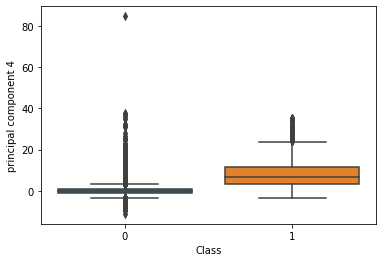

In [33]:
ax = sns.boxplot(x=df_final['Class'], y=df_final['principal component 4'], data=df_final)

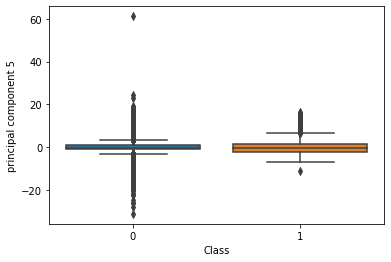

In [34]:
ax = sns.boxplot(x=df_final['Class'], y=df_final['principal component 5'], data=df_final)

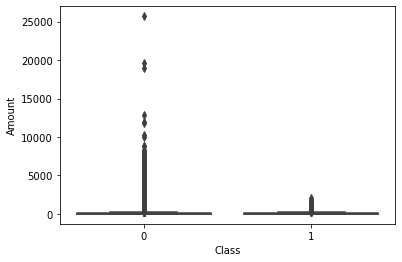

In [35]:
ax = sns.boxplot(x=df_final['Class'], y=df_final['Amount'], data=df_final)

In [36]:
print(df_final['principal component 1'].quantile(0.1))
print(df_final['principal component 1'].quantile(0.9))

-62826.54042555027
59786.8595766855


In [37]:
df_final['principal component 1']=np.where(df_final['principal component 1']<-62826.54,-62826.54,df_final['principal component 1'])
df_final['principal component 1']=np.where(df_final['principal component 1']>59786.86,59786.86,df_final['principal component 1'])


In [38]:
print(df_final['principal component 2'].quantile(0.1))
print(df_final['principal component 2'].quantile(0.9))

-1.7503201317892776
1.871648749210603


In [39]:
df['principal component 2']=np.where(df_final['principal component 2']<-1.75,-1.75,df_final['principal component 2'])
df['principal component 2']=np.where(df_final['principal component 2']>1.87,1.87,df_final['principal component 2'])

In [40]:
print(df_final['principal component 4'].quantile(0.1))
print(df_final['principal component 4'].quantile(0.9))

-1.6395267566620784
1.2898976177994814


In [41]:
df_final['principal component 4']=np.where(df_final['principal component 4']<-1.33,-1.33,df_final['principal component 4'])
df_final['principal component 4']=np.where(df_final['principal component 4']>1.36,1.36,df_final['principal component 4'])

In [42]:
print(df_final['principal component 5'].quantile(0.1))
print(df_final['principal component 5'].quantile(0.9))

-1.3920634030983683
1.685982372447984


In [43]:
df_final['principal component 5']=np.where(df_final['principal component 5']<-1.33,-1.33,df_final['principal component 5'])
df_final['principal component 5']=np.where(df_final['principal component 5']>1.36,1.36,df_final['principal component 5'])

In [44]:
print(df_final['Amount'].quantile(0.1))
print(df_final['Amount'].quantile(0.9))

1.0
203.0


In [45]:
df_final['Amount']=np.where(df_final['Amount']<-1.33,-1.33,df_final['Amount'])
df_final['Amount']=np.where(df_final['Amount']>1.36,1.36,df_final['Amount'])

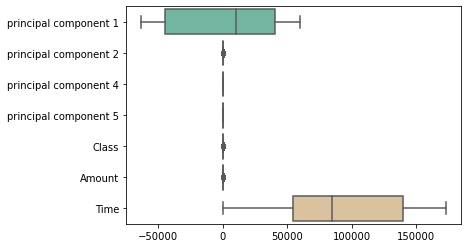

In [46]:
# Final dataset after solving problem oulier and multicolinearity
ax = sns.boxplot(data=df_final, orient="h", palette="Set2")

In [47]:
x= df_final.drop(labels=['Class'], axis=1)
y= df_final['Class']

Requirement already up-to-date: imbalanced-learn in c:\users\mohsen\anaconda3\lib\site-packages (0.8.1)


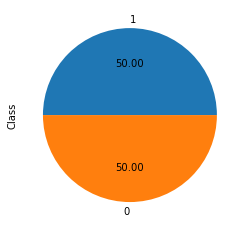

In [48]:
# balanced data set
# import library
!pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_res,Y_res = rus.fit_resample(x,y)
ax= Y_res.value_counts().plot.pie(autopct='%.2f')

In [49]:
# Split data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res,Y_res, test_size=0.30, random_state=1)

In [50]:
# Normalize data set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
#Random Forests
# Feature Scaling
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
model = clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
Y_test.shape
Y_pred.shape
#Import scikit-learn metrics module for accuracy calculation
#Evaluating the Algorithm
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))

Mean Absolute Error: 0.0777027027027027
Mean Squared Error: 0.0777027027027027
Root Mean Squared Error: 0.27875204519913876
Accuracy: 0.9222972972972973
Precision: 0.9517241379310345
Recall: 0.8961038961038961
area under curve (auc):  0.9234040607280044


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[135   7]
 [ 16 138]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       142
           1       0.95      0.90      0.92       154

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [53]:
# Evaluate a Random Forest model using k-fold cross-validation
# prepare the cross-validation procedure
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# Evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
precision = cross_val_score(model, X_train, Y_train, cv=10, scoring='precision')
print('Precision: ' , mean(precision))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
recall = cross_val_score(model, X_train, Y_train, cv=10, scoring='recall')
print('Recall: ' , mean(precision))
# View confusion matrix for test data and predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)
print('f1:', f1_score(Y_test, Y_pred))

Accuracy: 0.912 (0.051)
Precision:  0.9228850434910806
Mean Absolute Error: 0.0777027027027027
Mean Squared Error: 0.0777027027027027
Root Mean Squared Error: 0.27875204519913876
Recall:  0.9228850434910806
f1: 0.923076923076923


In [54]:
# Area under the precision-recall curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_test, probs)
print('AUC: %.2f' % auc)
precision = cross_val_score(model, X_train, Y_train, cv=10, scoring='precision')
print('Precision: ' , mean(precision))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
recall = cross_val_score(model, X_train, Y_train, cv=10, scoring='recall')
print('Recall: ' , mean(precision))
# View confusion matrix for test data and predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)


AUC: 0.96
Precision:  0.9260848416289594
Mean Absolute Error: 0.0777027027027027
Mean Squared Error: 0.0777027027027027
Root Mean Squared Error: 0.27875204519913876
Recall:  0.9260848416289594


array([[135,   7],
       [ 16, 138]], dtype=int64)

In [55]:
#Support Vector Machine
Y_train=Y_train.astype(float)
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, Y_train)

SVC(degree=8, kernel='poly')

In [56]:
from sklearn import svm
clf_svm = svm.LinearSVC(random_state=7)
model = clf_svm.fit(X_train, Y_train)  
Y_pred=clf_svm.predict(X_train)
Y_pred = svclassifier.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[138   4]
 [ 84  70]]
              precision    recall  f1-score   support

           0       0.62      0.97      0.76       142
           1       0.95      0.45      0.61       154

    accuracy                           0.70       296
   macro avg       0.78      0.71      0.69       296
weighted avg       0.79      0.70      0.68       296



In [58]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Accuracy: 0.7027027027027027
Precision: 0.9459459459459459
Recall: 0.45454545454545453
Mean Absolute Error: 0.2972972972972973


In [59]:
# Accuracy with Cross validation for SVM 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
model = svc.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('f1:', f1_score(Y_test, Y_pred))

Accuracy: 0.905 (0.048)
Precision: 0.9459459459459459
Recall: 0.45454545454545453
area under curve (auc):  0.7131882202304738
Mean Absolute Error: 0.2972972972972973
f1: 0.6140350877192983


In [60]:
#Logistic Regression
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Accuracy: 0.7027027027027027
Precision: 0.9459459459459459
Recall: 0.45454545454545453
Mean Absolute Error: 0.2972972972972973


In [61]:
#Evaluate a logistic regression model using k-fold cross-validation
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# Evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('f1:', f1_score(Y_test, Y_pred))

Accuracy: 0.898 (0.059)
Precision: 0.9459459459459459
Recall: 0.45454545454545453
area under curve (auc):  0.7131882202304738
Mean Absolute Error: 0.2972972972972973
f1: 0.6140350877192983


In [62]:
#the Naive Bayes Algorithm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model =classifier.fit(X_train, Y_train)
y_pred  =  classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test,Y_pred)
# Acuracy
ac
# CONFUSION MATRIX
cm

array([[138,   4],
       [ 84,  70]], dtype=int64)

In [63]:
# Accuracy and Cross validation
from sklearn.model_selection import cross_val_score
# use the same model as before
clf = clf.fit(X_train,Y_train)
# X,y will automatically devided by 3 folder, the scoring I will still use the accuracy
scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print('Accuracy',scores.mean())
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("area under curve (auc): ", metrics.roc_auc_score(Y_test, Y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('f1:', f1_score(Y_test, Y_pred))

[0.73913043 0.8115942  0.8115942  0.86956522 0.88405797 0.75362319
 0.82608696 0.89855072 0.86764706 0.76470588]
Accuracy 0.8226555839727194
Precision: 0.9459459459459459
Recall: 0.45454545454545453
area under curve (auc):  0.7131882202304738
Mean Absolute Error: 0.2972972972972973
f1: 0.6140350877192983
